### Load the training data & generate the test data

In [1]:
import utils
import tensorflow as tf
from tensorflow.keras import preprocessing
import numpy as np

In [2]:
training_set = np.loadtxt("balanced_training_set_1mil.dat", dtype=str, delimiter=',')
labels = np.loadtxt("balanced_label_set_1mil.dat", dtype=int, delimiter=',')

In [3]:
# inverted card figures
CF_I = {
    '2':     0,
    '3':     1,
    '4':     2,
    '5':     3,
    '6':     4,
    '7':     5,
    '8':     6,
    '9':     7,
    'T':     8,
    'J':     9,
    'Q':     10,
    'K':     11,
    'A':     12}

CC_I = {
    'S':    0,
    'H':    1,
    'D':    2,
    'C':    3}

### Convert Data into 2D

In [4]:
training_set_2d = []
tmp = []
for han in training_set:
    for cr in han:
        tmp.append(CC_I[cr[0]])
        tmp.append(CF_I[cr[1]])
    training_set_2d.append(tmp)
    tmp =[]

#### Fits elements are symbols and second elements are ranks

In [5]:
training_set_2d[0]

[3, 2, 3, 1, 3, 0, 0, 10, 3, 10, 1, 0, 3, 7]

In [6]:
card_str_list = []
catgory_list = []
for l in range(len(training_set_2d)):
    card_str_list.append(list(training_set_2d[l]))
    catgory_list.append(labels[l])
    
depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((card_str_list, catgory_list))

#### Test set prep

In [8]:
test_set = []
for i in range(10000):
    New_deck = utils.init_standard_deck()
    chosen_cards, remained_cards = utils.get_random_cards(New_deck, 7)
    test_set.append(utils.Card_Rank(chosen_cards))

In [9]:
tmp_set = []
for z in test_set:
    tmp_set.append(z[4])

In [10]:
test_set_2d = []
tmp = []
for han in tmp_set:
    for cr in han:
        tmp.append(CC_I[cr[0]])
        tmp.append(CF_I[cr[1]])
    test_set_2d.append(tmp)
    tmp =[]

In [13]:
card_str_list = []
catgory_list = []

for row in test_set:
    catgory_list.append(row[0])

depth = 9
catgory_list = tf.one_hot(catgory_list, depth)


In [14]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_set_2d, catgory_list))

In [15]:
test_dataset

<TensorSliceDataset shapes: ((14,), (9,)), types: (tf.int32, tf.float32)>

### Shuffle Data

In [16]:
BUFFER_SIZE = 10
BATCH_SIZE = 100
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [17]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('type: ', type(example.numpy()))
    print('label: ', label.numpy())
    print('type: ', type(label.numpy()))

text:  [[ 1  3  3 ...  1  3  3]
 [ 3  2  3 ...  0  3  7]
 [ 1  3  3 ...  1  3  3]
 ...
 [ 2  6  1 ... 12  0 12]
 [ 0  4  3 ... 10  2 12]
 [ 2  6  1 ... 12  0 12]]
type:  <class 'numpy.ndarray'>
label:  [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0

### FNN Model

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(9)
])

In [3]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 14)                0         
_________________________________________________________________
dense (Dense)                (None, 56)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_2 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_3 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_4 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_5 (Dense)              (None, 56)                3

In [27]:
history = model.fit(train_dataset, epochs=120,
                    validation_data=test_dataset, 
                    validation_steps=1)

Epoch 1/120
8868/8868 [==============================] - 12s 1ms/step - loss: 1.4744 - accuracy: 0.3285 - val_loss: 9.1204 - val_accuracy: 0.1600
Epoch 2/120
8868/8868 [==============================] - 11s 1ms/step - loss: 1.4411 - accuracy: 0.3578 - val_loss: 8.8726 - val_accuracy: 0.1400
Epoch 3/120
8868/8868 [==============================] - 11s 1ms/step - loss: 1.4199 - accuracy: 0.3758 - val_loss: 9.2061 - val_accuracy: 0.1500
Epoch 4/120
8868/8868 [==============================] - 11s 1ms/step - loss: 1.4112 - accuracy: 0.3791 - val_loss: 9.1359 - val_accuracy: 0.1400
Epoch 5/120
8868/8868 [==============================] - 12s 1ms/step - loss: 1.3967 - accuracy: 0.3865 - val_loss: 8.9721 - val_accuracy: 0.1400
Epoch 6/120
8868/8868 [==============================] - 11s 1ms/step - loss: 1.3525 - accuracy: 0.4124 - val_loss: 9.0014 - val_accuracy: 0.1400
Epoch 7/120
8868/8868 [==============================] - 11s 1ms/step - loss: 1.3102 - accuracy: 0.4313 - val_loss: 9.0373 -

8868/8868 [==============================] - 12s 1ms/step - loss: 0.9184 - accuracy: 0.5966 - val_loss: 10.0641 - val_accuracy: 0.1500
Epoch 112/120
8868/8868 [==============================] - 11s 1ms/step - loss: 0.9141 - accuracy: 0.5991 - val_loss: 10.6986 - val_accuracy: 0.1300
Epoch 113/120
8868/8868 [==============================] - 11s 1ms/step - loss: 0.9219 - accuracy: 0.5954 - val_loss: 9.9192 - val_accuracy: 0.1500
Epoch 114/120
8868/8868 [==============================] - 12s 1ms/step - loss: 0.9225 - accuracy: 0.5977 - val_loss: 10.0300 - val_accuracy: 0.1500
Epoch 115/120
8868/8868 [==============================] - 11s 1ms/step - loss: 0.9263 - accuracy: 0.5953 - val_loss: 10.0076 - val_accuracy: 0.1500
Epoch 116/120
8868/8868 [==============================] - 11s 1ms/step - loss: 0.9095 - accuracy: 0.6005 - val_loss: 9.8957 - val_accuracy: 0.1600
Epoch 117/120
8868/8868 [==============================] - 12s 1ms/step - loss: 0.9128 - accuracy: 0.5993 - val_loss: 10.1

In [28]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

100/100 [==============================] - 0s 1ms/step - loss: 9.3637 - accuracy: 0.1974
Test Loss: 9.363666534423828
Test Accuracy: 0.19740000367164612


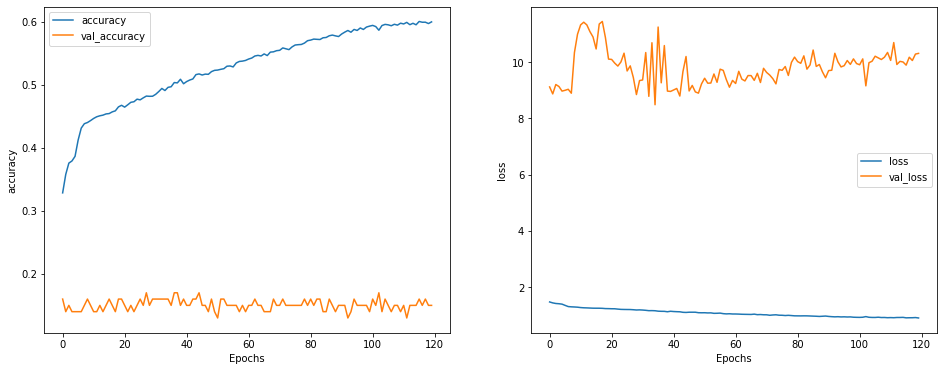

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

## RRNN Model

In [5]:
i = tf.keras.layers.Input(shape=(14,))
x = tf.keras.layers.Flatten(input_shape=(14,))(i)
x = tf.keras.layers.Dense(54, activation = None)(x)
i_res = x

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Flatten(input_shape=(14,))(x)

x = tf.keras.layers.Dense(9)(x)



In [6]:
model = tf.keras.models.Model(i, x)

In [7]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [9]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 14)           0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 54)           810         flatten_1[0][0]                  
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 54)           2970        dense_11[0][0]                   
_______________________________________________________________________________________

In [22]:
history = model.fit(train_dataset, epochs=120,
                    validation_data=test_dataset, 
                    validation_steps=1)

Epoch 1/120
8868/8868 [==============================] - 28s 3ms/step - loss: 1.6038 - accuracy: 0.3000 - val_loss: 5.7421 - val_accuracy: 0.1600
Epoch 2/120
8868/8868 [==============================] - 29s 3ms/step - loss: 1.5803 - accuracy: 0.3112 - val_loss: 5.8498 - val_accuracy: 0.1700
Epoch 3/120
8868/8868 [==============================] - 28s 3ms/step - loss: 1.5500 - accuracy: 0.3150 - val_loss: 6.1083 - val_accuracy: 0.1500
Epoch 4/120
8868/8868 [==============================] - 29s 3ms/step - loss: 1.5255 - accuracy: 0.3283 - val_loss: 6.1793 - val_accuracy: 0.1500
Epoch 5/120
8868/8868 [==============================] - 29s 3ms/step - loss: 1.5034 - accuracy: 0.3439 - val_loss: 6.3692 - val_accuracy: 0.1500
Epoch 6/120
8868/8868 [==============================] - 29s 3ms/step - loss: 1.4794 - accuracy: 0.3612 - val_loss: 6.4007 - val_accuracy: 0.1600
Epoch 7/120
8868/8868 [==============================] - 28s 3ms/step - loss: 1.4462 - accuracy: 0.3833 - val_loss: 6.6502 -

Epoch 57/120
8868/8868 [==============================] - 31s 4ms/step - loss: 0.9858 - accuracy: 0.5749 - val_loss: 6.3870 - val_accuracy: 0.1400
Epoch 58/120
8868/8868 [==============================] - 31s 3ms/step - loss: 0.9775 - accuracy: 0.5775 - val_loss: 6.3151 - val_accuracy: 0.1500
Epoch 59/120
8868/8868 [==============================] - 30s 3ms/step - loss: 0.9716 - accuracy: 0.5812 - val_loss: 6.2803 - val_accuracy: 0.1500
Epoch 60/120
8868/8868 [==============================] - 31s 4ms/step - loss: 0.9619 - accuracy: 0.5848 - val_loss: 6.2056 - val_accuracy: 0.1600
Epoch 61/120
8868/8868 [==============================] - 31s 3ms/step - loss: 0.9599 - accuracy: 0.5865 - val_loss: 6.1886 - val_accuracy: 0.1600
Epoch 62/120
8868/8868 [==============================] - 30s 3ms/step - loss: 0.9494 - accuracy: 0.5908 - val_loss: 6.3305 - val_accuracy: 0.1500
Epoch 63/120
8868/8868 [==============================] - 29s 3ms/step - loss: 0.9514 - accuracy: 0.5906 - val_loss: 6

In [23]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

100/100 [==============================] - 0s 2ms/step - loss: 6.0434 - accuracy: 0.2154
Test Loss: 6.043397903442383
Test Accuracy: 0.21539999544620514


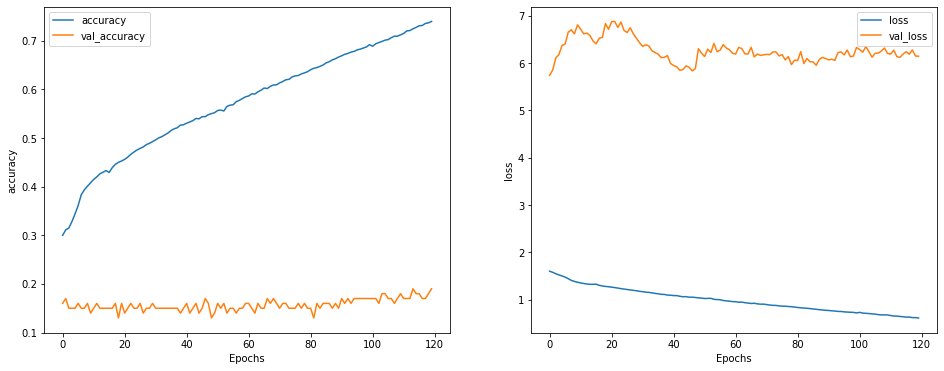

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')